<div id="mylogo">
<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">
</div>

<hr style="border-width:2px;border-color:#75DFC1"><br>
<center><h1>Practical Work</h1></center><br>
<center><h3>Machine Learning</h3></center><br>
<hr style="border-width:2px;border-color:#75DFC1">

### Instructions

The next practical work is a study on the number of human damages (deaths and injuries) and property damages during a tsunami.

The data comes from a public database retrieved from Google Cloud Platform. The columns of this dataset that we will keep are:

```python
columns = [
 'year',
 'month',
 'day',
 'country',
 'injuries',
 'deaths',
 'houses_des',
 'houses_dam',
 'arr_day',
 'arr_hour',
 'arr_min',
 'period',
 'first_moti',
 'latitude',
 'longitude',
 'runup_ht',
 'runup_ht_r',
 'runup_hori',
 'dist_from_',
 'hour',
 'cause_code',
 'event_vali',
 'event_va_1',
 'eq_mag_unk',
 'eq_mag_mb',
 'eq_mag_ms',
 'eq_mag_mw',
 'eq_mag_ml',
 'eq_mag_mfa',
 'eq_magnitu',
 'eq_magni_1',
 'eq_depth',
 'max_event_',
 'ts_mt_abe',
 'ts_mt_ii',
 'ts_intensi',
 'num_runup',
 'num_slides',
 'map_slide_',
 'map_eq_id', 
 'human_damages',
 'houses_damages']
```

They primarily concern the metrics associated with the event that caused the tsunami, its physical characteristics, and the characteristics of the location affected by the tsunami.

1 - First, import the necessary packages and the data file: 'tusnamis.csv'. Display its info and convert the columns to lowercase.

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Insert your code here

In [7]:
# import necessary packages
import sys
import math
import datetime
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('Historical_Tsunami_Event_Locations_with_Runups.csv')

# Display the columns of df and the info of df
# For displaying, a tip
np.set_printoptions(threshold = sys.maxsize)
print(df.columns)
print(df.columns.to_list())
print(df.info())

df.columns = df.columns.str.lower()


Index(['X', 'Y', 'FID', 'ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY',
       'DATE_STRIN', 'ARR_DAY',
       ...
       'INJURIES_1', 'INJURIES_2', 'MISSING_TO', 'MISSING__1', 'MISSING__2',
       'MAP_VOL_ID', 'HOUSES_D_5', 'HOUSES_D_6', 'HOUSES_D_7', 'NUM_DEPOSI'],
      dtype='object', length=104)
['X', 'Y', 'FID', 'ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'DATE_STRIN', 'ARR_DAY', 'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD', 'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY', 'REGION_COD', 'RUNUP_HT', 'RUNUP_HT_R', 'RUNUP_HORI', 'TYPE_MEASU', 'TYPE_MEA_1', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES', 'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A', 'INJURIES_D', 'HOUSES_DES', 'HOUSES_AMO', 'HOUSES_D_1', 'HOUSES_DAM', 'HOUSES_D_2', 'HOUSES_D_3', 'COMMENTS', 'DOUBTFUL', 'DIST_FROM_', 'EVENT_REGI', 'EVENT_RE_1', 'PRED_TRAV_', 'PRED_TRAV1', 'URL', 'TSEVENT_UR', 'HOUR', 'MINUTE', 'SECOND', 'REGION', 'CAUSE_CODE', 'CAUSE', 'EVENT_VALI', 'EVEN

3 - The next step will include the population data and the gross domestic product per capita data: 'population.csv' and 'gdp_per_capita.csv'. Perform the necessary preprocessing. The hypothesis will be that the characteristics of the tsunami alone are not sufficient to predict the number of human damages or the number of property damages.

In [5]:
# Insert your code here
# We use this dictionary for imputing values
gdp_per_capita_dict = {
    "afghanistan": 547,
    "bhutan": 3162,
    "channel islands": 37235,
    "cuba": 8616,
    "eritrea": 617,
    "gibraltar": 81000,
    "greenland": 45167,
    "guam": 34529,
    "isle of man": 105375,
    "Not classified": 30000,
    "lebanon": 7556,
    "liechtenstein": 160750,
    "st. martin (french part)": 14000,
    "northern mariana islands": 16200,
    "palau": 14500,
    "korea, dem. people's rep.": 1140,
    "san marino": 69000,
    "south sudan": 268,
    "syrian arab republic": 919,
    "tonga": 5000,
    "venezuela, rb": 6800,
    "british virgin islands": 33333,
    "virgin islands (u.s.)": 38000,
    "taiwan":35129,
    "venezuela": 15975,
    "turkey" : 10674,
    "yemen" : 650,
    "egypt" : 4295,
    "south korea" : 32422, 
    'russia':15262
}

In [8]:
gdp_per_capita_dict = {
    "afghanistan": 547,
    "bhutan": 3162,
    "channel islands": 37235,
    "cuba": 8616,
    "eritrea": 617,
    "gibraltar": 81000,
    "greenland": 45167,
    "guam": 34529,
    "isle of man": 105375,
    "Not classified": 30000,
    "lebanon": 7556,
    "liechtenstein": 160750,
    "st. martin (french part)": 14000,
    "northern mariana islands": 16200,
    "palau": 14500,
    "korea, dem. people's rep.": 1140,
    "san marino": 69000,
    "south sudan": 268,
    "syrian arab republic": 919,
    "tonga": 5000,
    "venezuela, rb": 6800,
    "british virgin islands": 33333,
    "virgin islands (u.s.)": 38000,
    "taiwan":35129,
    "venezuela": 15975,
    "turkey": 10674,
    "yemen": 650,
    "egypt": 4295,
    "south korea": 32422, 
    "russia":15262,
    "micronesia": 3714
}

dict_replace = {'usa': 'united states', 'usa territory':'united states', 'myanmar (burma)':'myanmar', 'uk territory':'united kingdom', 'east china sea':'china',
 'micronesia, fed. states of':'micronesia', 'east timor': 'indonesia', 'azores (portugal)':'portugal', 'uk':'united kingdom', 'east china sea':'china',
 'cook islands': 'france', 'martinique (french territory)':'france'}

# We acquire the data and then rename the columns
gdp = pd.read_csv('gdp_per_capita.csv', on_bad_lines ='skip', sep = ',')
gdp = gdp[['Country Name', '2022']].rename({'Country Name':'country', '2022':'gdp_per_capita'}, axis = 1)

# Then we convert all the values to lowercase
gdp['country'] = gdp['country'].str.lower()
df['country'] = df['country'].str.lower()

# We handle outliers and missing values
gdp = gdp[gdp['country'] != 'Not classified']
gdp['country'] = gdp['country'].replace(dict_replace)
# On merge
df['country'] = df['country'].replace(dict_replace)
data = df.merge(gdp, on = 'country', how = 'left')

# We do the same thing with population
population = pd.read_csv('countries-by-population-density-_-countries-by-density-2024.csv')
population['country'] = population['country'].str.lower()
population['country'] = population['country'].replace(dict_replace)

data = data.merge(population, on = 'country', how = 'left')

data['GDP_per_capita'] = data['country'].apply(lambda x: gdp_per_capita_dict.get(x))
data['gdp_per_capita'] = data['gdp_per_capita'].fillna(data['GDP_per_capita'])
data.drop('GDP_per_capita', axis = 1, inplace = True)


4 - Display the information of the resulting DataFrame, which we will call '<I>data</I>'. We will then create our target variables for two different problems:

<ul>
<li>predict the number of deaths + injuries (<I>deaths</I> + <I>injuries</I>)</li>
<li>predict the number of material damages (destroyed + damaged houses) (<I>houses_dam</I> + <I>houses_des</I>)</li>
</ul>
To do this, we create a specific function that will sum the two columns. Remember that <strong>np.nan + 1 = np.nan</strong>. Therefore, we need a case-specific function to apply to the two columns of each problem. We can also simply replace the null values with zeros because we will only select the records with non-null values (we assume there will always be deaths, so we remove the zeros which are very numerous in our dataset; the class bias is such that we make this assumption, but we could use methods specific to biased datasets).

In [ ]:
# Insert your code here

In [9]:
'''def custom_sum(x, y):
    if (math.isnan(x) & math.isnan(y)):
        return np.nan
    elif math.isnan(x):
        return y
    elif math.isnan(y):
        return x
    else:
        return x + y 

    
data['houses'] = data[['houses_dam', 'houses_des']].apply(lambda x: custom_sum(x['houses_dam'], x['houses_des']), axis = 1)

print("le nombre de records de dommages matériels")
print(len(data['houses'][(~data['houses'].isnull())&(data['houses']!=0)]))
# Here, this is not necessary because the records with houses_dam and houses_des are non-null separately

data['human_damages'] = data[['deaths', 'injuries']].apply(lambda x: custom_sum(x['deaths'], x['injuries']), axis = 1)

print("le nombre de records de dommages humains")
print(len(data['human_damages'][(~data['deaths'].isnull())&(data['injuries']!=0)]))
'''


# Or
data[['houses_dam', 'houses_des']].fillna(0, inplace = True)
data['houses_damages'] = data['houses_dam'] + data['houses_des']

data[['deaths', 'injuries']].fillna(0, inplace = True)
data['human_damages'] = data['deaths'] + data['injuries']

human_damages = data[(~data['human_damages'].isnull())&(data['human_damages']!=0)].drop('houses_damages', axis = 1)
houses_damages = data[(~data['houses_damages'].isnull())&(data['houses_damages']!=0)].drop('human_damages', axis = 1)
print("Size of the dataset human_damages")
print(len(human_damages))
print("Size of the dataset houses_damages")
print(len(houses_damages))

Size of the dataset human_damages
883
Size of the dataset houses_damages
452


Conduct a simple correlation study on the numerical variables. What can we deduce from it?

In [8]:
# Insert your code here

In [10]:
columns = [
 'month',
 'day',
 'country',
 'period',
 'latitude',
 'longitude',
 'runup_ht',
 'runup_ht_r',
 'runup_hori',
 'dist_from_',
 'hour',
 'cause_code',
 'event_vali',
 'eq_mag_unk',
 'eq_mag_mb',
 'eq_mag_ms',
 'eq_mag_mw',
 'eq_mag_mfa',
 'eq_magnitu',
 'eq_magni_1',
 'eq_depth',
 'max_event_',
 'ts_mt_ii',
 'ts_intensi',
 'num_runup',
 'num_slides',
 'map_slide_',
 'map_eq_id',
 'houses_damages', 
 'human_damages',
]

correlation_matrix = houses_damages[columns[:-1]].select_dtypes('number').corr()

# We could use sns.heatmap, but it is not as presentable

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

correlation_matrix.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

# You can do the same operation with human_damages; the correlations are even less significant

,month,day,period,latitude,longitude,runup_ht,runup_ht_r,runup_hori,dist_from_,hour,cause_code,event_vali,eq_mag_unk,eq_mag_mb,eq_mag_ms,eq_mag_mw,eq_mag_mfa,eq_magnitu,eq_magni_1,eq_depth,max_event_,ts_mt_ii,ts_intensi,num_runup,num_slides,map_slide_,map_eq_id,houses_damages
month,1.000,0.275,-0.059,0.098,0.195,-0.023,-0.051,-0.031,-0.082,0.049,-0.043,-0.003,0.023,-0.008,-0.002,-0.032,0.019,-0.001,0.001,0.004,0.009,0.018,0.028,-0.047,0.040,0.014,-0.017,-0.035
day,0.275,1.000,0.010,0.274,-0.136,0.049,-0.009,-0.040,0.031,-0.053,-0.005,-0.079,-0.065,-0.083,-0.060,-0.140,-0.020,-0.065,-0.063,-0.099,0.047,-0.064,-0.079,-0.035,-0.085,-0.091,-0.062,-0.018
period,-0.059,0.010,1.000,0.035,-0.099,0.022,0.093,0.061,0.332,-0.042,-0.041,-0.064,-0.009,-0.032,-0.061,-0.034,-0.009,-0.062,-0.061,-0.038,-0.030,-0.046,-0.051,-0.011,-0.012,-0.015,-0.052,-0.011
latitude,0.098,0.274,0.035,1.000,-0.101,0.118,0.095,-0.130,-0.072,-0.051,0.011,-0.002,-0.011,-0.170,-0.007,-0.121,0.014,-0.008,-0.005,-0.088,0.075,0.111,0.096,0.033,0.026,-0.019,-0.105,0.039
longitude,0.195,-0.136,-0.099,-0.101,1.000,-0.124,-0.236,-0.034,-0.432,0.092,-0.010,0.154,0.034,0.060,0.191,0.089,-0.042,0.178,0.178,0.096,0.010,0.113,0.078,0.042,0.043,0.034,0.140,0.046
runup_ht,-0.023,0.049,0.022,0.118,-0.124,1.000,0.550,0.173,-0.024,-0.104,-0.102,-0.160,-0.022,-0.079,-0.152,-0.084,-0.022,-0.154,-0.154,-0.095,-0.074,-0.116,-0.126,-0.027,-0.030,-0.038,-0.130,-0.014
runup_ht_r,-0.051,-0.009,0.093,0.095,-0.236,0.550,1.000,0.225,0.112,-0.232,-0.227,-0.357,-0.050,-0.176,-0.339,-0.187,-0.050,-0.344,-0.343,-0.212,-0.166,-0.259,-0.282,-0.060,-0.067,-0.086,-0.291,-0.044
runup_hori,-0.031,-0.040,0.061,-0.130,-0.034,0.173,0.225,1.000,0.022,-0.066,-0.064,-0.101,-0.014,-0.050,-0.096,-0.053,-0.014,-0.097,-0.097,-0.060,-0.047,-0.073,-0.080,-0.017,-0.019,-0.024,-0.082,-0.017
dist_from_,-0.082,0.031,0.332,-0.072,-0.432,-0.024,0.112,0.022,1.000,-0.123,-0.120,-0.189,-0.026,-0.093,-0.179,-0.099,-0.026,-0.182,-0.182,-0.112,-0.088,-0.137,-0.149,-0.032,-0.035,-0.045,-0.154,-0.032
hour,0.049,-0.053,-0.042,-0.051,0.092,-0.104,-0.232,-0.066,-0.123,1.000,0.233,0.627,0.157,0.490,0.626,0.554,-0.006,0.621,0.619,0.515,0.285,0.414,0.425,0.103,0.204,0.219,0.622,0.066


Conclusion, there is almost no linear correlation between the variables and the target variables.

<strong>Interactions between variables</strong>: Sometimes, interactions between multiple variables can have a significant impact on the target variable, even if these variables individually have a low correlation with the target. Non-linear models or machine learning techniques such as random forests, neural networks, or support vector machines (SVM) can capture these complex interactions.

<strong>Variable transformation</strong>: It is possible that the relationship between the explanatory variables and the target is not linear. Transformations of variables (logarithmic, polynomial, etc.) can sometimes reveal stronger relationships with the target.

5 - These are small datasets and we will first have to clean them, encode them, standardize them, do a PCA, then do data augmentation. Retrieve useful columns from columns. Study the distribution of target variables. What are the types of the remaining columns?

In [ ]:
# Insert your code here


In [11]:
houses_damages = houses_damages[columns[:-1]].reset_index(drop = True)
human_damages = human_damages[columns[:-2]+['human_damages']].reset_index(drop = True)
pd.set_option('display.max_rows', 104)
pd.set_option('display.min_rows', 104)
print(houses_damages.isna().sum().sort_values(ascending = False).head(1))
print(human_damages.isna().sum().sort_values(ascending = False).head(1))
print(human_damages.describe())
print(human_damages.describe())
print(human_damages.duplicated().sum())
print(houses_damages.duplicated().sum())

month    0
dtype: int64
month    0
dtype: int64
            month         day      period    latitude   longitude    runup_ht  \
count  883.000000  883.000000  883.000000  883.000000  883.000000  883.000000   
mean     7.115515   16.368063    0.264892   17.989446   48.721574    4.176954   
std      3.755905    9.438029    3.428415   24.375526  108.431481   19.347965   
min      0.000000    0.000000    0.000000  -45.400000 -176.000000    0.000000   
25%      3.000000    9.000000    0.000000   -3.108500  -72.666500    0.000000   
50%      8.000000   17.000000    0.000000   19.990000  116.404000    0.000000   
75%     11.000000   25.000000    0.000000   37.910000  137.135000    4.700000   
max     12.000000   31.000000   84.000000   62.291000  178.433000  524.260000   

       runup_ht_r   runup_hori    dist_from_        hour  ...  eq_magni_1  \
count  883.000000   883.000000    883.000000  883.000000  ...  883.000000   
mean     1.554926    69.094337    483.680634    1.835787  ...    1.4

The dataset is clean. The distribution of the target variables can be put in the form of a violinplot, pay attention to the distribution of the variables (mean, median).

In [ ]:
# Insert your code here

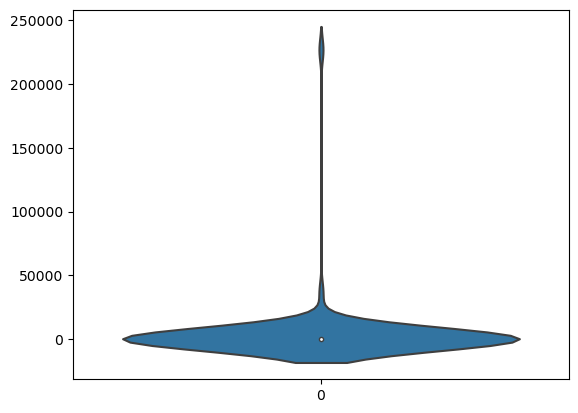

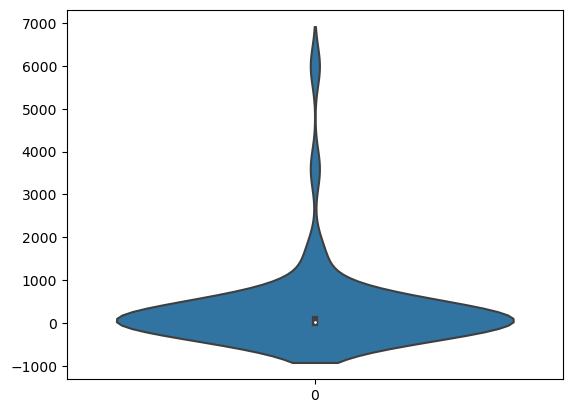

     month  day             country  period   latitude   longitude  runup_ht  \
806      3   11               japan     0.0  39.350000  141.917000     19.00   
364      7   17    papua new guinea     0.0  -3.033000  142.100000     15.03   
811      3   11               japan     0.0  39.267000  141.883000      9.00   
708      3   11               japan     0.0  38.166700  140.883300      0.00   
22       3    9           indonesia     0.0   0.009000   98.000000      0.00   
822      7   13               japan     0.0  38.500000  143.800000      0.00   
304      8    3           nicaragua     0.0  13.000000  -87.500000      0.00   
590      6   16               japan     0.0  34.880000  132.430000     10.00   
594      4   16               japan     0.0  34.300000  129.300000      6.00   
552     10   28               japan     0.0  34.083000  136.200000      0.00   
517     11    1               spain     0.0  36.533000   -6.300000     18.30   
280      8    3           nicaragua     

In [12]:
sns.violinplot(human_damages['human_damages'].head(100)) # On arrive à 75% de la distribution à 200 records
plt.show();
sns.violinplot(houses_damages['houses_damages'].head(50)) # On arrive à 75% de la distribution à 200 records
plt.show();

#We will cut records above 6000 for human_damages and below 9000 for houses_damages
human_damages = human_damages.sort_values(by='human_damages')[human_damages['human_damages'] < 6000]
houses_damages = houses_damages.sort_values(by ='houses_damages')[houses_damages['houses_damages'] < 9000]
print(human_damages.tail(100))
print(houses_damages.tail(100))

We will move on to encoding the countries. Then to standardization to make an alternative to PCA since the variables are not linearly correlated.

In [ ]:
# Insert your code here

In [13]:
X = pd.get_dummies(human_damages.select_dtypes('object'))
print(X)
human_damages = pd.concat([human_damages.drop('country', axis = 1), X], axis = 1)
print(human_damages)
print(human_damages.columns.to_list())

X = pd.get_dummies(houses_damages.select_dtypes('object'))
houses_damages = pd.concat([houses_damages.drop('country', axis = 1), X], axis = 1)
print(houses_damages)
print(houses_damages.columns.to_list())

     country_bangladesh  country_canada  country_chile  country_china  \
882               False           False          False          False   
306               False            True          False          False   
152               False           False           True          False   
507               False           False          False          False   
506               False           False          False          False   
504               False           False          False          False   
502               False           False          False          False   
496               False           False          False          False   
495               False           False          False          False   
167               False           False           True          False   
493               False           False          False          False   
492               False           False          False          False   
491               False           False          Fa

As part of our problem, we must create datasets of variables and series of target variables. Our target variables are human_damages and houses_damages respectively. We will therefore have two regressions because these variables are quantitative. We now need to scale the datasets.

In [ ]:
# Insert your code here

In [14]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
y_1 = human_damages['human_damages']
y_2 = houses_damages['houses_damages']
human_damages_scaled = pd.DataFrame(sc1.fit_transform(human_damages.drop('human_damages', axis = 1)), columns = human_damages.drop('human_damages', axis = 1).columns)
houses_damages_scaled = pd.DataFrame(sc2.fit_transform(houses_damages.drop('houses_damages', axis = 1)), columns = houses_damages.drop('houses_damages', axis = 1).columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
y_1 = human_damages['human_damages']
y_2 = houses_damages['houses_damages']
human_damages_scaled = pd.DataFrame(sc1.fit_transform(human_damages.drop('human_damages', axis = 1)), columns = human_damages.drop('human_damages', axis = 1).columns)
houses_damages_scaled = pd.DataFrame(sc2.fit_transform(houses_damages.drop('houses_damages', axis = 1)), columns = houses_damages.drop('houses_damages', axis = 1).columns)

We can use a visualization technique to see if there are clusters, which can indicate to us a possibility of predicting our targets later. What do you deduce from this? We can also decide to create bins to do a classification instead of a regression, we will talk about it at the end of the notebook.

In [ ]:
# Insert your code here

In [25]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(human_damages_scaled)
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_1)
fig.update_layout(
    title="t-SNE visualization human damages",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()


AttributeError: 'NoneType' object has no attribute 'split'

For houses_damages:

In [ ]:
# Insert your code here

In [30]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne_house = TSNE(n_components=2,perplexity=40, random_state=42)
X_tsne_house = tsne.fit_transform(houses_damages_scaled)
fig = px.scatter(x=X_tsne_house[:, 0], y=X_tsne_house[:, 1], color=y_2)
fig.update_layout(
    title="t-SNE visualization houses damages",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()


AttributeError: 'NoneType' object has no attribute 'split'

First, let's try a dimension reduction method that is not PCA. Why ? 
Then, launch into a first prediction with the ElasticNet and a GradientBoostingRegressor. You can use transformed variables first, then variables without transformations. For what ? 
The GradientBoostingRegressor exists in several packages, look at the differences in results with xgboost.

<strong>For information</strong>:

The Gradient Boosting Regressor is a powerful machine learning technique used for regression tasks, which builds a set of decision trees sequentially.

<strong>Concept</strong>
<ul><li><strong>Boosting</strong>: This is an ensemble technique that combines the predictions of several basic estimators (typically decision trees) to improve robustness and precision. Each tree attempts to correct the mistakes made by the previous ones.</li>
<li><strong>Gradient Descent</strong>: The model minimizes the loss function by adding new models that reduce the error of the combined model using gradient descent.</li>
</ul>
<strong>Key Steps of the Gradient Boosting Regressor</strong>
<ul><li><strong>Initialization</strong>: Start with an initial prediction (usually the average of the target values).</li>
<li><strong>Iterative Improvement</strong>: At each step, fit a new decision tree to the residuals (errors) of the previous model's predictions.</li>
<li><strong>Model Update</strong>: Combine the existing model with the new tree to improve the overall prediction.</li></ul>

<strong>ElasticNet</strong> is a linear regression technique that combines the penalties of Lasso regression (L1) and Ridge regression (L2). It is particularly useful when you have data with many correlated features or when the number of features is larger than the number of samples.

In [31]:
# Insert your code here
import umap
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [32]:

# Application of UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=20)  # Reduce to 10 dimensions for example
X_reduced = umap_reducer.fit_transform(human_damages_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_1, test_size=0.2, random_state=42)

# Train the regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))

# The result is better with tsne (0.46) but these methods should not be used for modeling, but for visualization


Mean Squared Error: 845047.3036205095
r2: 0.03942639712228213


With houses_damages:

In [ ]:
# Insert your code here

In [33]:
# with houses
# Application of UMAP for dimensionality reduction
umap_reducer_2 = umap.UMAP(n_components=20)  #Reduce to 10 dimensions for example
X_reduced = umap_reducer_2.fit_transform(houses_damages_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_2, test_size=0.2, random_state=42)

# Train the regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))

# The result is better with tsne (0.46) but these methods should not be used for modeling, but for visualization

Mean Squared Error: 2449773.5771171073
r2: -0.3673871374129545


Start again without dimension reduction method. With the addition of noise to augment the data. First you will create a function that will allow you to add noise to all columns.

In [ ]:
# Insert your code here

In [34]:
X = human_damages_scaled
y = y_1

def add_noise(X, noise_level=0.001):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

# Augment data
X_noisy = pd.concat([X, X.apply(add_noise)], axis = 0).reset_index(drop = True)
y_noisy = pd.concat([y, y], axis = 0).reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

from sklearn.linear_model import ElasticNet
e = ElasticNet()
e.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = e.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))


Mean Squared Error: 663317.0462962769
r2: 0.18178383978641854


With houses_damages:

In [4]:
# Insert your code here

In [35]:
# with houses
X_house = houses_damages_scaled
y_house = y_2

# Augment data
X_noisy = pd.concat([X_house, X_house.apply(add_noise)], axis = 0).reset_index(drop = True)
y_noisy = pd.concat([y_house, y_house], axis = 0).reset_index(drop = True)

X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

from sklearn.linear_model import ElasticNet
e = ElasticNet()
e.fit(X_train_house, y_train_house)

# Make predictions and evaluate the model
y_pred = e.predict(X_test_house)
mse = mean_squared_error(y_test_house, y_pred)
r2 = r2_score(y_test_house, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))

Mean Squared Error: 1224369.716336706
r2: 0.13807624978295452


Do the same thing with the GradientBoostingRegressor. And let's look at the difference with the xgboost package which is a second version of the same algorithm.

In [ ]:
# Insert your code here

In [36]:
# Train the regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))

#xgboost
import xgboost as xgb

xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print((f"r2: {r2}"))

Mean Squared Error: 459536.27640712156
r2: 0.43315189974367396
Mean Squared Error: 459536.27640712156
r2: 0.43315189974367396


##### Laius on human_damages: with clustering KMeans

In [37]:
from sklearn.cluster import KMeans
score = []

def add_noise(X, noise_level=0.001):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

for k in range(1, 90):
    km = KMeans(n_clusters= k)
    centroids = km.fit(human_damages_scaled)
    human_damages_scaled['clustering'] = pd.Series(km.labels_)
    X = human_damages_scaled
    y = y_1

    # Augment data
    X_noisy = pd.concat([X, X.apply(add_noise)], axis = 0).reset_index(drop = True)
    y_noisy = pd.concat([y, y], axis = 0).reset_index(drop = True)

    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
    # Train the regression model
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = gbr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score.append(r2)

best_n = np.argmax(score)
print('Best number of clusters', best_n, 'Best score', score[best_n])

AttributeError: 'NoneType' object has no attribute 'split'

In [94]:
human_damages_scaled.drop('clustering', axis = 1, inplace = True)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(human_damages_scaled)

def add_noise(X, noise_level=0.001):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

for k in range(1, 90):
    km = KMeans(n_clusters= k)
    centroids = km.fit(X_tsne)
    human_damages_scaled['clustering'] = pd.Series(km.labels_)
    X = human_damages_scaled
    y = y_1

    # Augment data
    X_noisy = pd.concat([X, X.apply(add_noise)], axis = 0).reset_index(drop = True)
    y_noisy = pd.concat([y, y], axis = 0).reset_index(drop = True)

    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
    # Train the regression model
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = gbr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score.append(r2)

best_n = np.argmax(score)
print('Best number of clusters', best_n, 'Best score', score[best_n])

Best number of clusters 63 Best score 0.5504907149934358


##### KMeans avec TSNE visualization

In [38]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 63)
centroids = km.fit(X_tsne)
centroids.cluster_centers_

NameError: name 'X_tsne' is not defined

In [ ]:
colors = ['100000' for x in range(0, 12)]
print(colors)
X_km =np.concatenate((X_tsne[:, 0], centroids.cluster_centers_[:, 0]), axis = 0)
Y_km =np.concatenate((X_tsne[:, 1], centroids.cluster_centers_[:, 1]), axis = 0)
colors = np.concatenate((y_1, np.array(colors)), axis = 0)
# Il faudrait changer le colors en couleurs strings, mais avec la bonne échelle

['100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000', '100000']


In [ ]:
colors

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3

In [39]:
human_damages_scaled['clustering'] = pd.Series(km.labels_)

AttributeError: 'KMeans' object has no attribute 'labels_'

The results go above 50% with 63 clusters.

#### Laius with AgglomerativeClustering

In [40]:
from sklearn.cluster import AgglomerativeClustering

for k in range(1, 90):
    # Perform Agglomerative Clustering
    n_clusters = k  # Specify the number of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(X_tsne)

    # Compute centroids of the clusters
    centroids = np.zeros((n_clusters, X_tsne.shape[1]))
    for i in range(n_clusters):
        # Select points that belong to the current cluster
        cluster_points = X_tsne[labels == i]
        # Compute the centroid as the mean of the points in the cluster
        centroids[i, :] = cluster_points.mean(axis=0)

    # Assign centroids as features
    centroid_features = np.zeros((X_tsne.shape[0], X_tsne.shape[1]))
    for i in range(X_tsne.shape[0]):
        centroid_features[i, :] = centroids[labels[i]]
    centroid_features = pd.DataFrame(centroid_features, columns = ['x', 'y'])

    X = pd.concat([human_damages_scaled, centroid_features], axis = 1)
    print(centroid_features)
    y = y_1

    # Augment data
    X_noisy = pd.concat([X, X.apply(add_noise)], axis = 0).reset_index(drop = True)
    y_noisy = pd.concat([y, y], axis = 0).reset_index(drop = True)

    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
    # Train the regression model
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = gbr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score.append(r2)

best_n = np.argmax(score)
print('Best number of clusters', best_n, 'Best score', score[best_n])

NameError: name 'X_tsne' is not defined

With houses_damages:

In [5]:
# Insert your code here

In [41]:
# with houses
# Train the regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train_house, y_train_house)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test_house)
mse = mean_squared_error(y_test_house, y_pred)
r2 = r2_score(y_test_house, y_pred)
print(f"Mean Squared Error for houses: {mse}")
print((f"r2 for houses: {r2}"))

Mean Squared Error for houses: 1107010.4719017614
r2 for houses: 0.22069403976608126


The score is not optimal. How could we optimize:
<ul>
<li> Redefine the problem in classification </li>
<li> We could study the correlations between the variables and the target variable a little better </li>
<li> We could do a gridsearch on the best algorithms, here the GradientBoostingRegressor seems to be the best choice </li>
<li> Add data (on the alert level, on the density of the region and not just the country) </li>
<li> Underfitting class data (and adding zeros) </li>
<li> Study how to augment data in other ways (depending on variable distribution, rotations, GAN) </li>
<li> We can try deep learning techniques </li>
</ul>
The score here is such that it would take a lot of extra work to get to a decent score.

##### Study of correlations

In [ ]:
# Insert your code here

In [ ]:
for col in human_damages.columns[1:32]:
    sns.scatterplot(data = human_damages, x = col, y = human_damages['human_damages'])
    plt.show(); 

In [43]:
sns.pairplot(human_damages[1:32])

KeyboardInterrupt: 

##### Gridsearch

In [ ]:
# Insert your code here

In [1]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001],
                'max_iter'  : [10000, 100000]
            }

grid_search = GridSearchCV(e, param_grid)
grid_search.fit(X_train_house, y_train_house)
y_pred = grid_search.predict(X_test_house)
r2 = r2_score(y_test_house, y_pred)

print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(['mean_test_score'],ascending = False)[:10]

NameError: name 'np' is not defined

#### Interpretability

PermutationExplainer explainer: 346it [00:29,  7.55it/s]                         


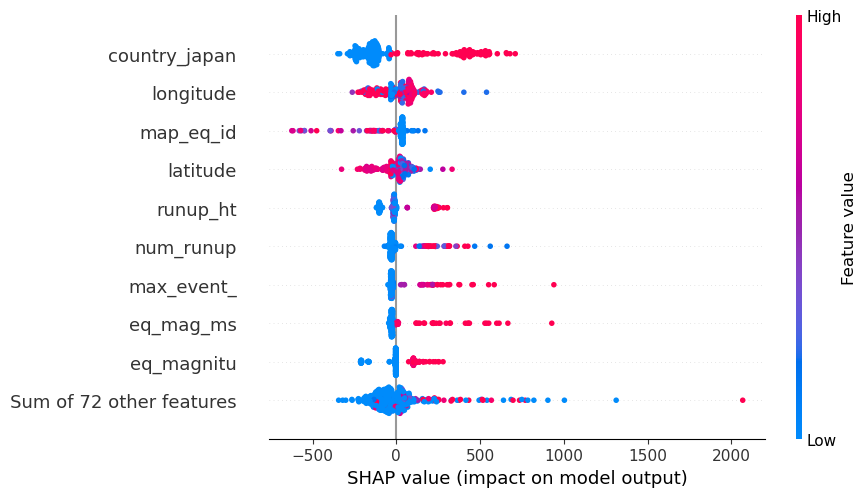

In [ ]:
km = KMeans(n_clusters= 63)
centroids = km.fit(human_damages_scaled)
human_damages_scaled['clustering'] = pd.Series(km.labels_)
X = human_damages_scaled
y = y_1

# Augment data
X_noisy = pd.concat([X, X.apply(add_noise)], axis = 0).reset_index(drop = True)
y_noisy = pd.concat([y, y], axis = 0).reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
# Train the regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
score.append(r2)

import shap
# Fits the explainer
explainer = shap.Explainer(gbr.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

#### Trying DL tehcniques

In [1]:
import keras
from keras.applications import EfficientNetB0
EfficientNet = EfficientNetB0(include_top=False)

for layer in EfficientNet.layers:
    layer.trainable = False

model = Sequential()
model.add(EfficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(128), activation = 'relu')
model.add(Dropout(0.2))
model.add(Dense(64), activation = 'relu')
model.add(Dropout(0.2))
model.add(Dense(32), activation = 'relu')
model.add(Dropout(0.2))
model.BatchNormalization()
model.add(Dense(1), activatio = 'linear')

model.compile(loss = 'mse', optimizer = 'Adam', metrics = ['acc'])


2024-07-18 09:10:04.064537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'Sequential' is not defined

#### Laius on adding density of the region
There is a dataset where we have the regions of the tsunamis in finer grainded than the countries. There is another dataset presenting the regions' densities. With updating the density and alert level, we might get to a better prediction.


## Conclusion

This always gives an ineffective score. We saw in the comments above how to possibly improve the score.

It is possible that these results could be improved thanks to a better description of the physical characteristics of events causing tsunamis, to characteristics of the tsunami upstream (and this on the day or in the hours preceding the alert, which would in all cases allow on statistical studies of tsunamis to make predictions and therefore to give recommendations or updates to the urban planning and alert policy of the affected regions). We could also add the land register, aerial views which would give an idea of ​​the condition of the buildings (solidity, material), in addition to the topography and congestion of the streets or spaces. We could even add population movement data. 

In this notebook, you saw some of the new techniques in a data science project and you were introduced to new concepts:
<ul>
<li>new algorithms and algorithm libraries (ElasticNet and its parameters, Gradient Boosting Regressor and xgboost)</li>
<li>new techniques for dimension reduction and visualization of clusters in the case of non-linear relationships between variables: umap and tsne</li>
<li>simple methods of data augmentation in regression</li>
<li>gridsearch allows you to improve the choice of parameters for better performance of your algorithms</li>
</ul>
It is possible to move forward in this project, and if you want to develop your research, you can go to these sites:
<ul>
<li><a href = 'https://www.rcuh.com/'>Pacific Tsunami Warning Center</a></li>
<li><a href= 'https://www.kaiyodai.ac.jp/en/'>Tokyo University of Marine Science and Technology</a></li>
</ul>